In [50]:
Pkg.add("SymPy")
using PyPlot
using SymPy

INFO: Package SymPy is already installed


In [51]:
#Incluímos la librería de herramientas
include("herramientas.jl")

herramientas

__Método de Newton__

In [52]:
#Definimos una función para probar la libreria
function f(z)
       return z*tan(z)-sqrt(complex(10-z^2))
       end

f (generic function with 1 method)

In [53]:
#Derivada de la función de arriba
function df(z)
       return tan(z)+z*sec(z)^2+(z/sqrt(complex(10-z^2)))
       end

df (generic function with 1 method)

In [54]:
#Usando el método de Newton
herramientas.Newton(f, df, 1)

1.1862608165029145 + 0.0im

In [55]:
#Comprobación 
f(herramientas.Newton(f, df, 1))

1.3322676295501878e-15 + 0.0im

__Integración con Método de Riemann__

In [56]:
herramientas.riemann(x->sin(x), 0, pi, 0.1)

1.999968366267071

__Integración con trapecio__

In [57]:
herramientas.trapecio(x->sin(x), 0, pi, 0.1)

1.997468926590932

__Integración con Simpson__

In [58]:
herramientas.simpson(x->sin(x), 0, pi, 0.1)

1.9991352197083576

__Interpolación de Lagrange__

In [59]:
#xAxis es el linspace de 0 a 2pi dividido en 10 puntos de manera uniforme
#yAxisCos es el array de la función coseno evaluada en los puntos de xAxis
xAxis = linspace(0, 2*pi, 10);
yAxisCos = cos.(xAxis);

In [60]:
#cosInt es el polinomio interpolado con los puntos anteriores... 
y = Sym("y");
cosInt = herramientas.lagrange(xAxis, yAxisCos, Sym("y"))

                     9                        8                         7     
5.6920614055489e-18*y  - 1.97979336359535e-5*y  + 0.000497576342935013*y  - 0.

                   6                        5                       4         
00411366974808214*y  + 0.00878850466172487*y  + 0.0243778891541915*y  + 0.0201

              3                      2                            
425548285172*y  - 0.512543349763835*y  + 0.003132547207505*y + 1.0

In [61]:
#xCosInt es un linspace que va de 0 a 2pi dividido mil veces... yCosInt es el array de puntos de cosInterpol evaluado en xCosInt

##Esto se hace para graficar el polinomio en el siguiente paso

xCosInt = linspace(0, 2pi, 1000);
yCosInt = cosInt.(xCosInt);

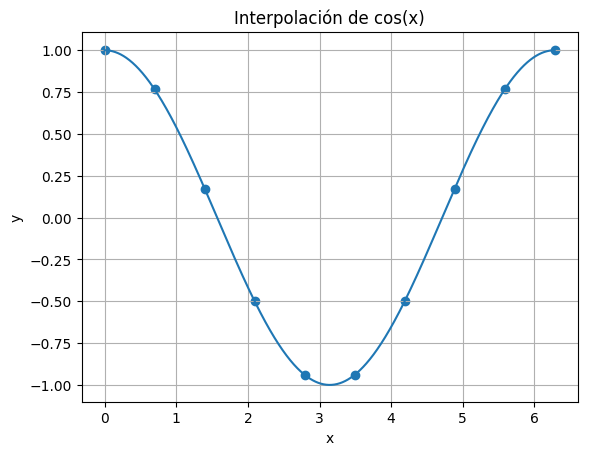

In [62]:
#El scatter grafica los puntos de interpolación
#El plot grafica el polinomio en en intervalo [0,2pi]

xlabel("x")
ylabel("y")
title("Interpolación de cos(x)")
scatter(xAxis, yAxisCos)
plot(xCosInt, yCosInt)
grid("on")

__Derivada numérica__

In [63]:
herramientas.numDer(x->e^(x), 2, 0.000001)

7.38905979424942

In [64]:
#Comprobación
e^(2)

7.38905609893065

__Método de Euler en 1D__

In [65]:
function test(t,x)
    a = 2.5;
    return -a*x;
end;
#aqui se probará la funcion de euler

In [66]:
function dTest(t,x)
    a = 2.5;
    return -a;
end;

In [67]:
#Se aplica el método de Euler con los cuatro tamaños de subintervalo, para la condición inicial x(0)=1
(timeArray1, xArray1) = herramientas.euler1D(test, 1.0, 0.0, 8.0, 1.0);
(timeArray2, xArray2) = herramientas.euler1D(test, 1.0, 0.0, 8.0, 0.5);
(timeArray3, xArray3) = herramientas.euler1D(test, 1.0, 0.0, 8.0, 0.2);
(timeArray4, xArray4) = herramientas.euler1D(test, 1.0, 0.0, 8.0, 0.01);

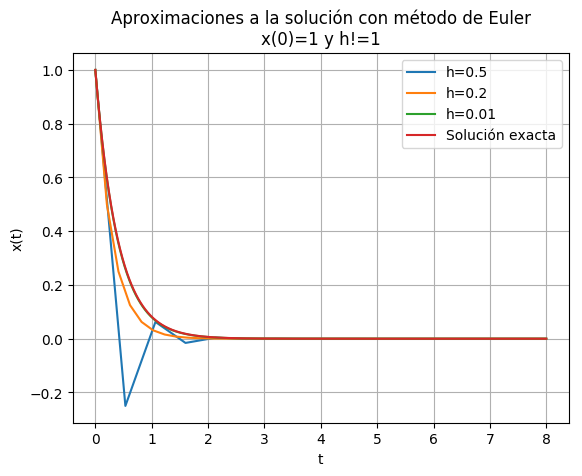

In [68]:
#Se grafican soluciones numéricas con h!=1.0 y la solución teórica para el paso anterior
xlabel("t");
ylabel("x(t)");
title("Aproximaciones a la solución con método de Euler\nx(0)=1 y h!=1");
grid("on");
plot(timeArray2, xArray2, label="h=0.5");
plot(timeArray3, xArray3, label="h=0.2");
plot(timeArray4, xArray4, label="h=0.01");
plot(timeArray4, exp.(-2.5*timeArray4), label="Solución exacta");
legend();

__Método de Euler en varias dimensiones__

In [69]:
#Se define la función para resolver con k=1
F(x,t)=[x[2], -1.0*x[1]]

F (generic function with 1 method)

In [70]:
#Se graficará sobre el intervalo [0,8]

list=0:0.01:8;

#En vec se guardan las soluciones y se dan como condiciones iniciales x(0)=0 y u(0)=2
vec=herramientas.eulerND(F,list,[0,2]);

In [71]:
#Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx1=map(x->x[1],vec);
listx2=map(x->x[2],vec);
listxreal=2*sin.(list); 
listxdotreal=2*cos.(list);

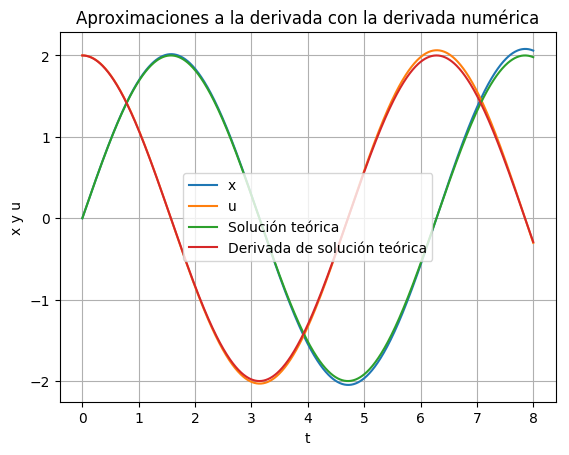

In [72]:
#Se grafican las aproximaciones y las soluciones teóricas
xlabel("t")
ylabel("x y u")
title("Aproximaciones a la derivada con la derivada numérica")
grid("on")
plot(list,listx1, label="x");
plot(list,listx2, label="u");
plot(list,listxreal, label="Solución teórica");
plot(list,listxdotreal, label="Derivada de solución teórica");
legend();

__Método de Euler implícito__

In [73]:
#Se define la función sobre la que se va a aplicar el método de Euler... Esta no depende de t
function g(x,t)
    a = 2.5;
    return -a*x;
end;

In [74]:
#Se calcula la derivada parcial respecto a x de la función g
function dg(x,t)
    a = 2.5;
    return -a;
end;

In [75]:
function G(y,y0,h,t)
    return y-y0-h*g(y,t);
end;

In [76]:
#Se calcula la derivada parcial respecto a y de la función G
function dG(y,y0,h,t)
    return 1-h*dg(y,t);
end;

In [77]:
#Se aplica el método de Euler con los cuatro tamaños de subintervalo, para la condición inicial x(0)=1
(timeArray1, xArray1) = herramientas.impEuler(G, dG, 0.0, 8.0, 1.0, 1.0);
(timeArray2, xArray2) = herramientas.impEuler(G, dG, 0.0, 8.0, 1.0, 0.5);
(timeArray3, xArray3) = herramientas.impEuler(G, dG, 0.0, 8.0, 1.0, 0.2);
(timeArray4, xArray4) = herramientas.impEuler(G, dG, 0.0, 8.0, 1.0, 0.01);

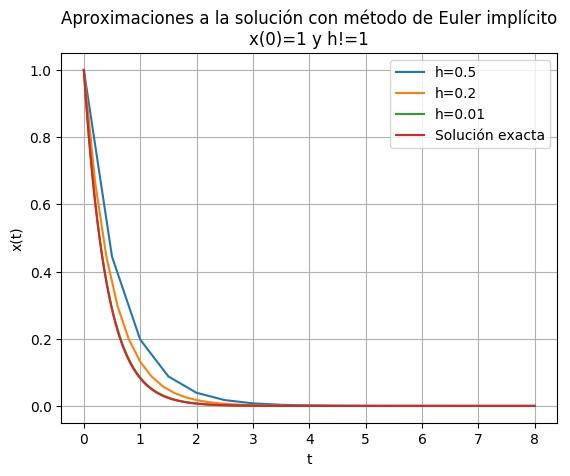

In [78]:
#Se grafican las tres soluciones numéricas con h!=1.0 y la solución teórica para el paso anterior
xlabel("t");
ylabel("x(t)");
title("Aproximaciones a la solución con método de Euler implícito\nx(0)=1 y h!=1");
grid("on");
plot(timeArray2, xArray2, label="h=0.5");
plot(timeArray3, xArray3, label="h=0.2");
plot(timeArray4, xArray4, label="h=0.01");
plot(timeArray4, exp.(-2.5*timeArray4), label="Solución exacta");
legend();

__Método del punto medio__

In [79]:
#Se aplica la regla del punto medio con cuatro tamaños de subintervalo, para la condición inicial x(0)=1 en g
#Es el test para la regla del punto medio
(timeArray1, xArray1) = herramientas.midP(g, 1.0, 0.0, 8.0, 0.75);
(timeArray2, xArray2) = herramientas.midP(g, 1.0, 0.0, 8.0, 0.5);
(timeArray3, xArray3) = herramientas.midP(g, 1.0, 0.0, 8.0, 0.2);
(timeArray4, xArray4) = herramientas.midP(g, 1.0, 0.0, 8.0, 0.01);

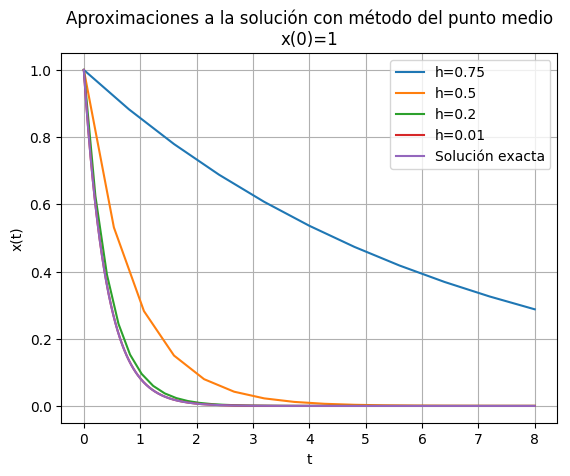

In [80]:
#Se grafican las cuatro soluciones numéricas y la solución teórica para el paso anterior
xlabel("t");
ylabel("x(t)");
title("Aproximaciones a la solución con método del punto medio\nx(0)=1");
grid("on");
plot(timeArray1, xArray1, label="h=0.75");
plot(timeArray2, xArray2, label="h=0.5");
plot(timeArray3, xArray3, label="h=0.2");
plot(timeArray4, xArray4, label="h=0.01");Runge-Kutta 1D
plot(timeArray4, exp.(-2.5*timeArray4), label="Solución exacta");
legend();

__Runge-Kutta 1D__

In [82]:
#Se aplica Runge-Kutta de orden 4 con cuatro tamaños de subintervalo, para la condición inicial x(0)=1 en f
(timeArray1, xArray1) = herramientas.RK(g, 1.0, 0.0, 8.0, 1.0);
(timeArray2, xArray2) = herramientas.RK(g, 1.0, 0.0, 8.0, 0.5);
(timeArray3, xArray3) = herramientas.RK(g, 1.0, 0.0, 8.0, 0.2);
(timeArray4, xArray4) = herramientas.RK(g, 1.0, 0.0, 8.0, 0.01);

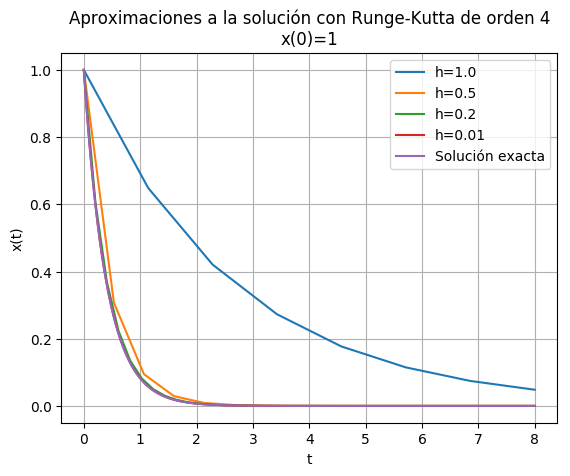

In [83]:
#Se grafican las cuatro soluciones numéricas y la solución teórica para el paso anterior
xlabel("t");
ylabel("x(t)");
title("Aproximaciones a la solución con Runge-Kutta de orden 4\nx(0)=1");
grid("on");
plot(timeArray1, xArray1, label="h=1.0");
plot(timeArray2, xArray2, label="h=0.5");
plot(timeArray3, xArray3, label="h=0.2");
plot(timeArray4, xArray4, label="h=0.01");
plot(timeArray4, exp.(-2.5*timeArray4), label="Solución exacta");
legend();

__Runge-Kutta en varias dimensiones__

In [84]:
#Se define la función para resolver con k=1 y m=1, que surge de resolver d2x/dt2=x
l(x,t)=[x[2], -1.0*x[1]]

l (generic function with 1 method)

In [85]:
#Se graficará sobre el intervalo [0,8] con h = 0.1
list=0:0.1:8;
#En vec se guardan las soluciones con Runge-Kutta y se dan como condiciones iniciales x(0)=0 y u(0)=2
vec=herramientas.RK4(l,list,[0,2]);

In [86]:
#Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx1rk=map(x->x[1],vec);
listx2rk=map(x->x[2],vec);
listxreal=2*sin.(list); 
listxdotreal=2*cos.(list);

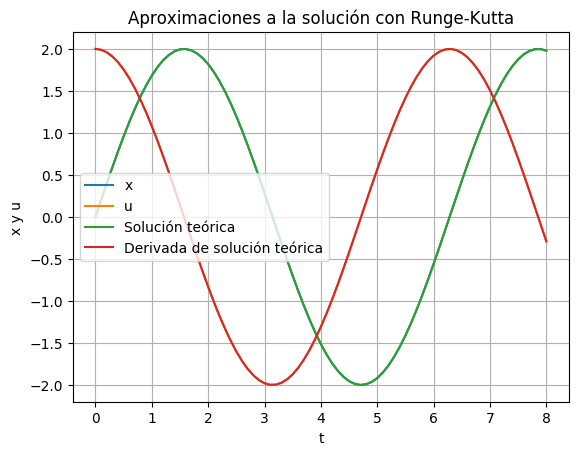

In [87]:
#Se grafican las aproximaciones y las soluciones teóricas
xlabel("t")
ylabel("x y u")
title("Aproximaciones a la solución con Runge-Kutta")
grid("on")
plot(list,listx1rk, label="x");
plot(list,listx2rk, label="u");
plot(list,listxreal, label="Solución teórica");
plot(list,listxdotreal, label="Derivada de solución teórica");
legend();